In [97]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models,datasets
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.utils import to_categorical
import os
import random
import matplotlib.image as mpimg
import math
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd

In [98]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [99]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,  17,  47,  47,  47,  47,  47,  47,
         28,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,  63,   0,   0,
          0,  62, 138, 197, 197, 197, 217, 253, 253, 253, 253, 253, 253,
        230,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 151, 170,   0,  56,
        232, 250, 253, 231, 217, 217, 217, 217, 217, 217, 217, 128, 179,
        132,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 104, 251, 170,  20, 233,
        253, 199,  84,  26,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   5, 203, 253, 160,   3,  20,
         20,   7,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  77, 253, 228,  21,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 150, 253, 249, 223, 223, 193,
         71,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 126, 253, 253, 253, 253, 253,
        253, 196, 121,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   8, 202, 191, 144, 144, 217,
        251, 253, 253, 170,   4,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         53, 236, 253, 253, 215,   3,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  34, 180, 253, 253, 128,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   2, 140, 253, 236,  36,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  37,   0,   0,   0,   0,   0,
          0,   0,   0,  13, 215, 253,  62,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 246,  53,   0,   0,   0,   0,
          0,   0,   0,   0, 105, 253,  62,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 254,  57,   0,   0,   0,   0,
          0,   0,   0,   0,  99, 253,  62,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 255,  65,   0,   0,   0,   0,
          0,   0,   0,  35, 217, 253,  62,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 227, 223, 115,  18,   0,   0,
          5,  68, 113, 222, 253, 242,  46,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  41, 224, 253, 227, 218, 218,
        220, 253, 253, 253, 249,  76,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  35, 150, 215, 253, 253,
        253, 253, 205, 175,  57,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [100]:
x_train, x_val, x_test = x_train / 255.0, x_val/255.0, x_test / 255.0

x_train = x_train[..., tf.newaxis]
x_val = x_val[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

y_train_hot = tf.keras.utils.to_categorical(y_train, 10)
y_val_hot = tf.keras.utils.to_categorical(y_val, 10)
y_test_hot = tf.keras.utils.to_categorical(y_test, 10)

In [101]:
x_train.shape

(48000, 28, 28, 1)

In [102]:
x_val.shape

(12000, 28, 28, 1)

In [103]:
x_test.shape

(10000, 28, 28, 1)

In [105]:
y_train[0]

5

In [106]:
y_train_hot[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

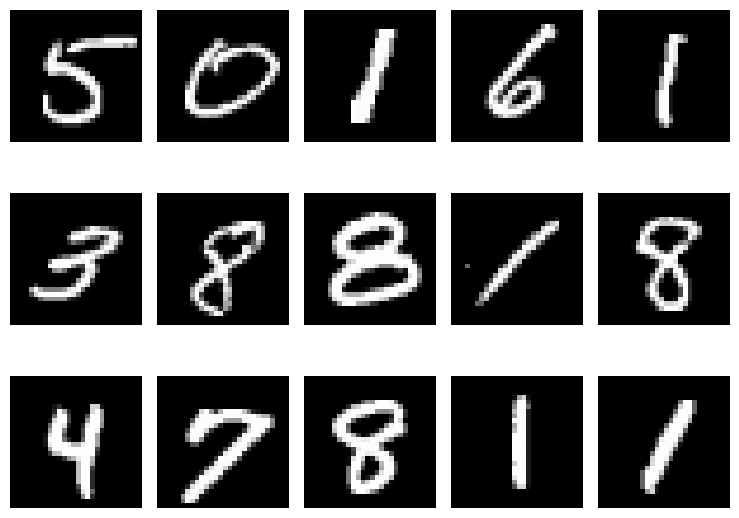

In [107]:
def plot_images(images, labels, num_rows, num_cols):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(1.5*num_cols, 2*num_rows))
    for i in range(num_rows * num_cols):
        ax = axes[i // num_cols, i % num_cols]
        ax.imshow(images[i], cmap='gray')
        ax.axis('off')
    plt.tight_layout()
    plt.show()


plot_images(x_train, y_train, num_rows=3, num_cols=5)

In [108]:
pd.Series(y_train).value_counts().sort_index()

0    4748
1    5420
2    4784
3    4912
4    4666
5    4317
6    4741
7    4966
8    4691
9    4755
Name: count, dtype: int64

In [109]:
classes = y_train_hot.shape[-1]
classes

10

In [110]:
input_shape = (28,28,1)

# Percettrone Multiplo

In [226]:
model_mlp = models.Sequential()
model_mlp.add(layers.Flatten())
model_mlp.add(layers.Dense(64, activation='relu'))
model_mlp.add(layers.Dense(32, activation='relu'))
model_mlp.add(layers.Dropout(0.3))
model_mlp.add(layers.Dense(classes, activation='softmax'))

In [227]:
model_mlp.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [229]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
batch_size = 128
history_mlp = model_mlp.fit(
    x_train,y_train_hot,
    batch_size = batch_size,
    epochs=20,
    callbacks= early_stopping,
    validation_data= (x_val,y_val_hot)
)

Epoch 1/20
375/375 [==============================] - 4s 8ms/step - loss: 0.6493 - accuracy: 0.8045 - val_loss: 0.2460 - val_accuracy: 0.9307
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3023 - accuracy: 0.9146 - val_loss: 0.1829 - val_accuracy: 0.9454
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.2287 - accuracy: 0.9346 - val_loss: 0.1584 - val_accuracy: 0.9524
Epoch 4/20
375/375 [==============================] - 2s 6ms/step - loss: 0.1910 - accuracy: 0.9470 - val_loss: 0.1350 - val_accuracy: 0.9593
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1664 - accuracy: 0.9521 - val_loss: 0.1247 - val_accuracy: 0.9632
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1479 - accuracy: 0.9588 - val_loss: 0.1207 - val_accuracy: 0.9631
Epoch 7/20
375/375 [==============================] - 3s 8ms/step - loss: 0.1294 - accuracy: 0.9640 - val_loss: 0.1159 - val_accuracy: 0.9657
Epoch 

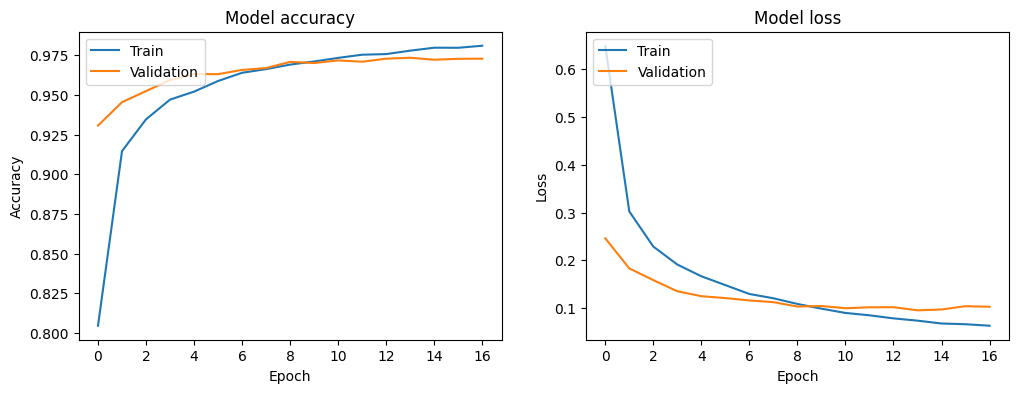

In [230]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_mlp.history['accuracy'])
plt.plot(history_mlp.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_mlp.history['loss'])
plt.plot(history_mlp.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [231]:
model_mlp.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 784)               0         
                                                                 
 dense_33 (Dense)            (None, 64)                50240     
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 dropout_15 (Dropout)        (None, 32)                0         
                                                                 
 dense_35 (Dense)            (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Rete Convoluzionale

Dinamica del processo di compressione del dato

In [191]:
def conv_output_dimension(input_dimension,dimension_filter,number_filters,padding = 0, stride = 1):

  output_dim = int(((input_dimension + 2*padding - dimension_filter)/stride) + 1)

  output_shape = (output_dim,output_dim,number_filters)
  return output_shape


conv_output_dimension(28,3,32)


(26, 26, 32)

In [192]:
def maxpool_output_dimension(input_dimension,dimension_filter,padding = 0, stride = 2):

      output_dim = int(((input_dimension - dimension_filter) / stride) + 1)

      output_shape = (output_dim,output_dim)
      return output_shape

maxpool_output_dimension(26,2)

(13, 13)

In [193]:

x = np.random.rand(4, 28, 28, 1)
y = layers.Conv2D(32, 3, activation='relu')(x)
y = layers.MaxPooling2D((2,2))(y)
y_flat = layers.Flatten()(y)
print(y_flat.shape)

(4, 5408)


In [194]:
dense_number =  y.shape[1] * y.shape[1] * y.shape[-1]
dense_number

5408

Inizializzazione modello

In [209]:
model_conv = models.Sequential()
model_conv.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape))
model_conv.add(layers.MaxPooling2D((2, 2)))
model_conv.add(layers.Flatten())
model_conv.add(layers.Dense(32, activation='relu'))
model_conv.add(layers.Dropout(0.3))
model_conv.add(layers.Dense(classes, activation='softmax'))

In [210]:
model_conv.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [211]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
batch_size = 128
history_conv = model_conv.fit(
    x_train,y_train_hot,
    batch_size = batch_size,
    epochs=20,
    callbacks= early_stopping,
    validation_data= (x_val,y_val_hot)
)

Epoch 1/20
375/375 [==============================] - 21s 53ms/step - loss: 0.5310 - accuracy: 0.8397 - val_loss: 0.1522 - val_accuracy: 0.9568
Epoch 2/20
375/375 [==============================] - 18s 49ms/step - loss: 0.2293 - accuracy: 0.9318 - val_loss: 0.1024 - val_accuracy: 0.9713
Epoch 3/20
375/375 [==============================] - 23s 61ms/step - loss: 0.1719 - accuracy: 0.9496 - val_loss: 0.0841 - val_accuracy: 0.9752
Epoch 4/20
375/375 [==============================] - 20s 53ms/step - loss: 0.1447 - accuracy: 0.9576 - val_loss: 0.0774 - val_accuracy: 0.9762
Epoch 5/20
375/375 [==============================] - 20s 55ms/step - loss: 0.1300 - accuracy: 0.9610 - val_loss: 0.0707 - val_accuracy: 0.9780
Epoch 6/20
375/375 [==============================] - 22s 58ms/step - loss: 0.1149 - accuracy: 0.9651 - val_loss: 0.0641 - val_accuracy: 0.9806
Epoch 7/20
375/375 [==============================] - 18s 48ms/step - loss: 0.1062 - accuracy: 0.9668 - val_loss: 0.0635 - val_accuracy:

Valutazione curve addestramento

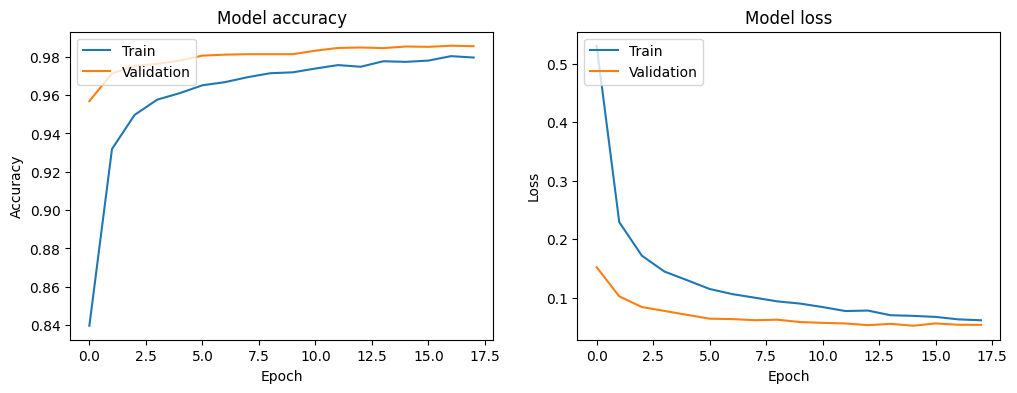

In [212]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_conv.history['accuracy'])
plt.plot(history_conv.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_conv.history['loss'])
plt.plot(history_conv.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [222]:
model_conv.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_13 (Flatten)        (None, 5408)              0         
                                                                 
 dense_28 (Dense)            (None, 32)                173088    
                                                                 
 dropout_13 (Dropout)        (None, 32)                0         
                                                                 
 dense_29 (Dense)            (None, 10)                330       
                                                     

Valutazione del modello sui dati di test

In [213]:
predictions = model_conv.predict(x_test)
predicted_classes = (predictions > 0.5).astype("int32")

313/313 [==============================] - 2s 6ms/step


In [214]:
pred = np.argmax(predicted_classes, axis = 1)
pred

array([7, 2, 1, ..., 4, 5, 6])

In [215]:
accuracy = accuracy_score(y_test,pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.983


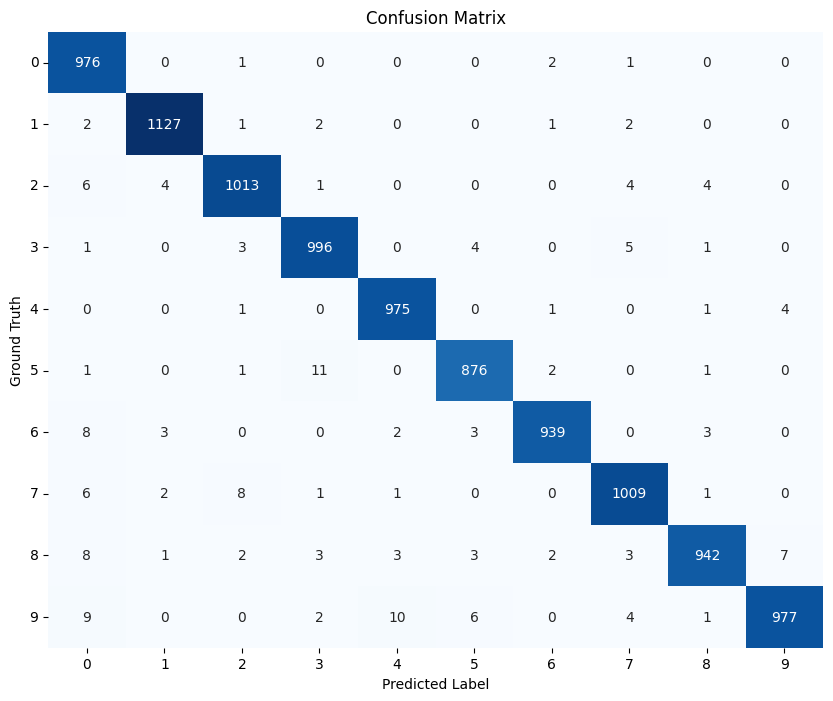

In [216]:

conf_matrix = confusion_matrix(y_test, pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)


plt.xlabel('Predicted Label')
plt.ylabel('Ground Truth')
plt.title('Confusion Matrix')
plt.xticks(np.arange(10) + 0.5, labels=np.arange(10), rotation=0)
plt.yticks(np.arange(10) + 0.5, labels=np.arange(10), rotation=0)
plt.show()

Visualizzazione filtri

In [217]:
for layer in model_conv.layers:
  if 'conv' not in layer.name:
    continue
  filters, biases = layer.get_weights()
  print(layer.name, filters.shape)

conv2d_15 (3, 3, 1, 32)


In [218]:
filters.shape

(3, 3, 1, 32)

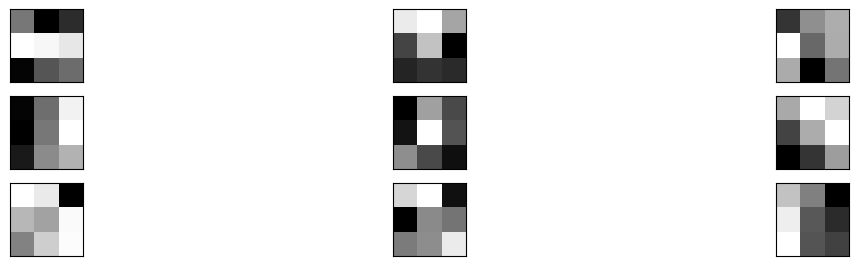

In [219]:
filters, biases = model_conv.layers[0].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

plt.figure(figsize=(14,10))
n_filters, ix = 9, 1
for i in range(n_filters):

 f = filters[:, :, :,i]


 ax = plt.subplot(n_filters, 3, ix)
 ax.set_xticks([])
 ax.set_yticks([])

 plt.imshow(f[:, :, :], cmap='gray')
 ix += 1

plt.show()

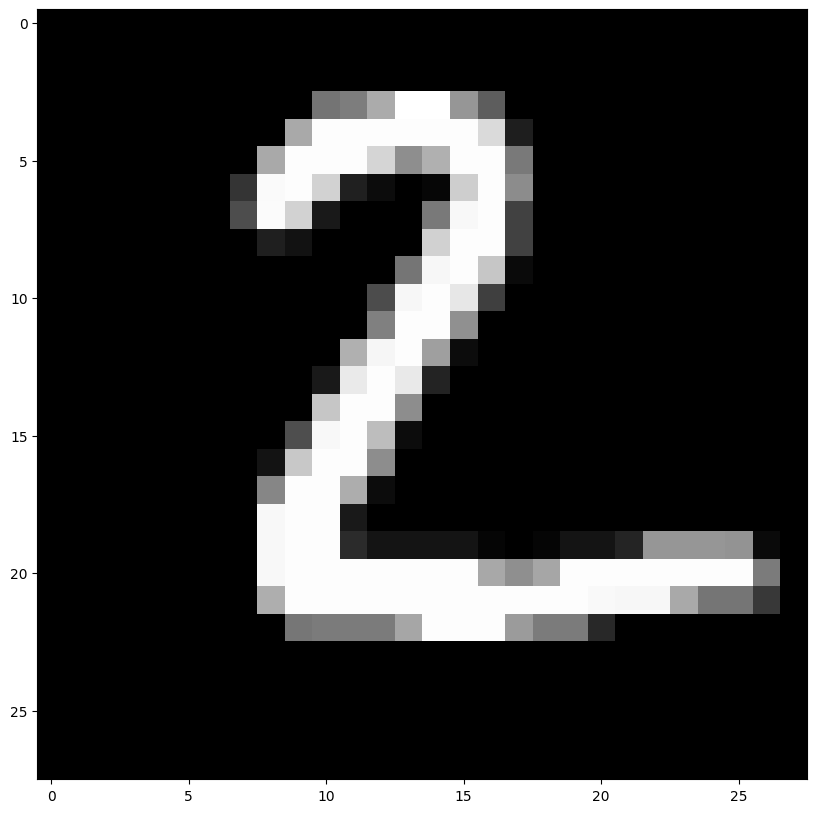

In [220]:
plt.figure(figsize=(14,10))
plt.imshow(x_test[1],cmap ="gray")


Visualizzazione feature maps

1/1 [==============================] - 0s 51ms/step


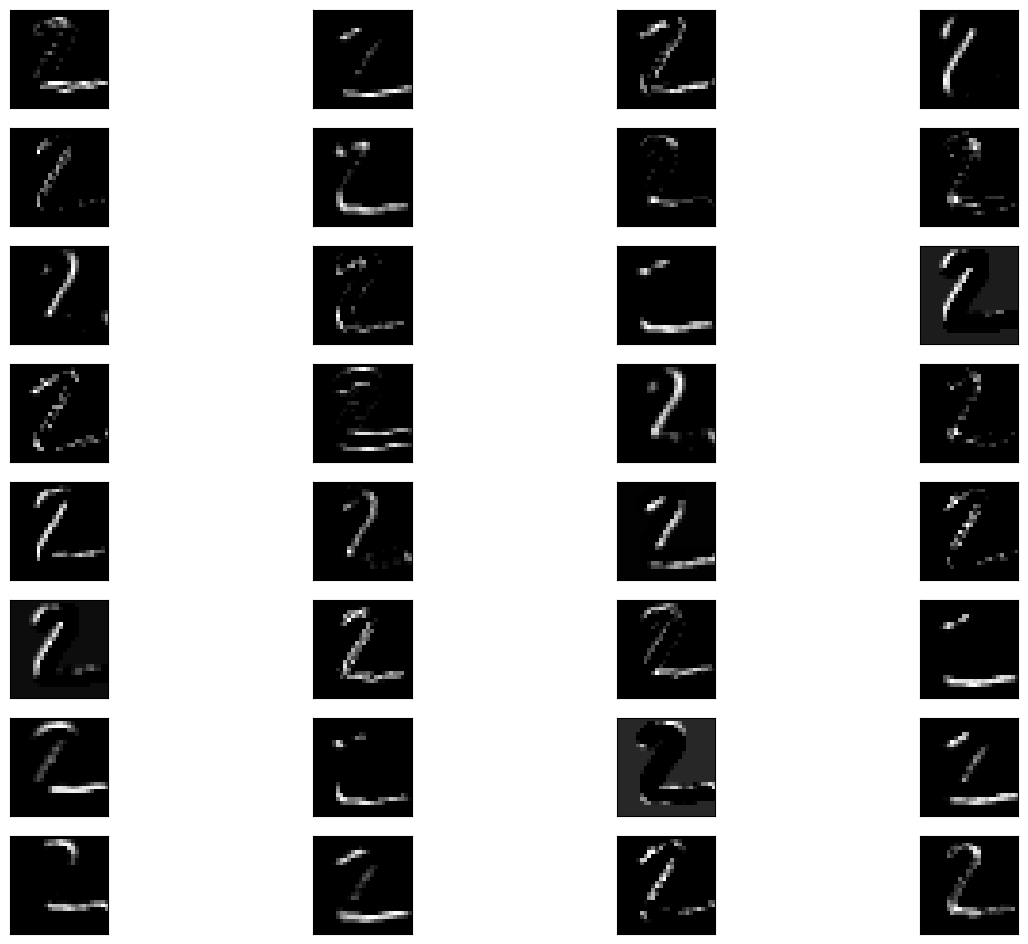

In [221]:
layer_outputs = [layer.output for layer in model_conv.layers if 'conv' in layer.name]
activation_model = tf.keras.Model(inputs=model_conv.input, outputs=layer_outputs)

img_test = x_test[1].copy()
img_test = np.expand_dims(img_test, axis=0)
feature_maps = activation_model.predict(img_test)

column = 8
row = 4
ix = 1
plt.figure(figsize=(15,12))
for _ in range(column):
 for _ in range(row):

  ax = plt.subplot(column, row, ix)
  ax.set_xticks([])
  ax.set_yticks([])

  plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
  ix += 1

plt.show()